# Topic Modeling for Amharic User Generated Texts

In [68]:
# (1) Preprocessing libraries

# Importing modules

import pandas as pd
import numpy as np
import time
import re
from pprint import pprint
import joblib
import sys

#NLP
import sklearn
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [69]:
#Re load the preprocessed dataset
data=pd.read_csv('Supervised_Topic_Classifier_Corpus.csv')

In [70]:
#Load Libraries
import matplotlib.pyplot as plt
import itertools
import time
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn import metrics
#save and loading models
import joblib

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier



from sklearn.ensemble import VotingClassifier,RandomForestClassifier, BaggingClassifier, AdaBoostClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [71]:
#load Data
print(data.columns)
data[['text','label']]=pd.DataFrame(data,columns=['clean_bigram','Topic'])
data=data[['text','label']]
data=data.dropna()
print(data.columns)

Index(['Unnamed: 0', 'Topic', 'text', 'text_stem', 'clean_bigram'], dtype='object')
Index(['text', 'label'], dtype='object')


In [72]:
data['label'].value_counts(),np.sum(data['label'].value_counts())

(News     5953
 Busi     2502
 Soci     1635
 Poli     1611
 Spor     1031
 Art       749
 Opin      458
 Law       371
 Cult      265
 Sine      176
 Minis      20
 Name: label, dtype: int64,
 14771)

In [73]:
#remove rows with minis as it is very small samples i.e. 20
data = data[data.label != 'Minis']
data['label'].value_counts()

News    5953
Busi    2502
Soci    1635
Poli    1611
Spor    1031
Art      749
Opin     458
Law      371
Cult     265
Sine     176
Name: label, dtype: int64

In [74]:
#SAVE it for storing in ZENODO
#data.to_json("Supervised_Topic_Classifier_Corpus.xml")
#data.to_csv("Supervised_Topic_Classifier_Corpus.csv")

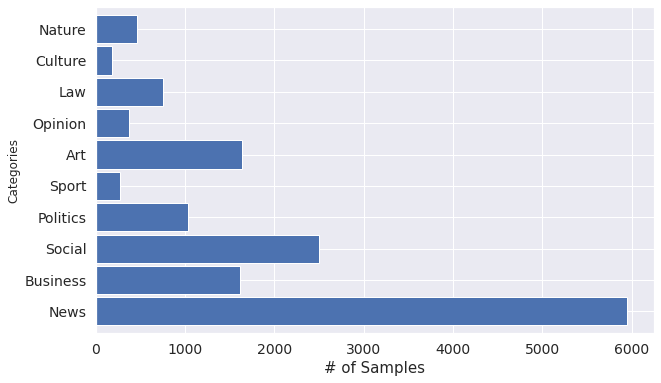

In [75]:
# Bar plot features vs ML based on AVG ACCuraCY Using ALL four data sets
# See table Table 4 in the manuscript
import pandas as pd 
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt 
data=[["News",5953],
      ["Business",1611],
      ["Social",2502],
      ["Politics",1031],
      ["Sport",265],
      ["Art",1635],
      ["Opinion",371],
      ["Law",749],
      ["Culture",176],
      ["Nature",458]
     ]

df=pd.DataFrame(data,columns=["Categories","NumOfSamples"])

df.plot(x="Categories", y=["NumOfSamples"], kind="barh",rot=0,width=0.9,figsize=(10,6),fontsize=14,legend=False)#,color=[ 'green', 'blue', 'orange','red'])
#plt.ylabel("# of Samples",fontsize=15, fontdict=font)
plt.xlabel("# of Samples",fontsize=15)
#plt.xlabel("")#Machine Learning Algorithms for Sentiment Classification",fontsize=14)

#plt.legend(bbox_to_anchor=(1.0,1.0))
#plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [73]:
#Exp. I. Without Stemming

# split the dataset into training and validation datasets 
train_data, test_data , train_labels, test_labels = train_test_split(data['text'], data['label'],stratify=data['label'], test_size=0.25,random_state=6007)

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=5,max_df = 0.8,sublinear_tf=True,use_idf=True)
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

#LDA as feature 
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda = LDA(n_components=10)
lda.fit(train_vectors)
training_ldafeatures = lda.transform(train_vectors)
testing_ldafeatures = lda.transform(test_vectors)


# Tfidf + LDA features
import scipy
new_train = scipy.sparse.hstack((train_vectors, training_ldafeatures),format='csr')
new_test = scipy.sparse.hstack((test_vectors, testing_ldafeatures),format='csr')

In [74]:
#loading SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

In [75]:
#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, precision_recall_fscore_support
from sklearn import model_selection

In [76]:
#columns = ["Feature",'model','metric', 'Score', 'trainTime',"testTime"]
columns = ['Feature','model','scores','metric', 'mean', 'std','time']
results =pd.DataFrame(columns=columns)
from sklearn.metrics import log_loss, make_scorer
LogLoss = make_scorer(log_loss)#, greater_is_better=False, needs_proba=True)
result = []

/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: 

Results for LR Feature settings  LDA
Training time: 2.282196s; Prediction time: 0.002852s
              precision    recall  f1-score   support

         Art       0.00      0.00      0.00       187
        Busi       0.57      0.10      0.17       626
        Cult       0.00      0.00      0.00        66
         Law       0.00      0.00      0.00        93
        News       0.40      0.95      0.57      1488
        Opin       0.00      0.00      0.00       114
        Poli       0.00      0.00      0.00       403
        Sine       1.00      0.07      0.13        44
        Soci       0.00      0.00      0.00       409
        Spor       0.49      0.16      0.24       258

    accuracy                           0.41      3688
   macro avg       0.25      0.13      0.11      3688
weighted avg       0.31      0.41      0.28      3688



/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for NB Feature settings  LDA
Training time: 0.034512s; Prediction time: 0.000824s
              precision    recall  f1-score   support

         Art       0.00      0.00      0.00       187
        Busi       0.00      0.00      0.00       626
        Cult       0.00      0.00      0.00        66
         Law       0.00      0.00      0.00        93
        News       0.40      1.00      0.57      1488
        Opin       0.00      0.00      0.00       114
        Poli       0.00      0.00      0.00       403
        Sine       0.00      0.00      0.00        44
        Soci       0.00      0.00      0.00       409
        Spor       0.00      0.00      0.00       258

    accuracy                           0.40      3688
   macro avg       0.04      0.10      0.06      3688
weighted avg       0.16      0.40      0.23      3688



/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for SVMR Feature settings  LDA
Training time: 7.972825s; Prediction time: 2.737324s
              precision    recall  f1-score   support

         Art       0.00      0.00      0.00       187
        Busi       0.00      0.00      0.00       626
        Cult       0.00      0.00      0.00        66
         Law       0.00      0.00      0.00        93
        News       0.41      0.98      0.58      1488
        Opin       0.00      0.00      0.00       114
        Poli       0.00      0.00      0.00       403
        Sine       0.83      0.11      0.20        44
        Soci       0.00      0.00      0.00       409
        Spor       0.73      0.39      0.51       258

    accuracy                           0.42      3688
   macro avg       0.20      0.15      0.13      3688
weighted avg       0.23      0.42      0.27      3688



/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for SVML Feature settings  LDA
Training time: 4.930878s; Prediction time: 1.316877s
              precision    recall  f1-score   support

         Art       0.00      0.00      0.00       187
        Busi       0.00      0.00      0.00       626
        Cult       0.00      0.00      0.00        66
         Law       0.00      0.00      0.00        93
        News       0.40      1.00      0.58      1488
        Opin       0.00      0.00      0.00       114
        Poli       0.00      0.00      0.00       403
        Sine       0.80      0.09      0.16        44
        Soci       0.00      0.00      0.00       409
        Spor       0.00      0.00      0.00       258

    accuracy                           0.40      3688
   macro avg       0.12      0.11      0.07      3688
weighted avg       0.17      0.40      0.23      3688



/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for SVMLin Feature settings  LDA
Training time: 0.329537s; Prediction time: 0.000693s
              precision    recall  f1-score   support

         Art       0.00      0.00      0.00       187
        Busi       0.33      0.00      0.01       626
        Cult       0.00      0.00      0.00        66
         Law       0.00      0.00      0.00        93
        News       0.41      0.99      0.58      1488
        Opin       0.00      0.00      0.00       114
        Poli       0.00      0.00      0.00       403
        Sine       1.00      0.09      0.17        44
        Soci       0.00      0.00      0.00       409
        Spor       0.66      0.10      0.17       258

    accuracy                           0.41      3688
   macro avg       0.24      0.12      0.09      3688
weighted avg       0.28      0.41      0.25      3688



/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for NeuralNet Feature settings  LDA
Training time: 9.352691s; Prediction time: 0.003696s
              precision    recall  f1-score   support

         Art       0.00      0.00      0.00       187
        Busi       0.43      0.36      0.39       626
        Cult       0.00      0.00      0.00        66
         Law       0.18      0.03      0.05        93
        News       0.53      0.91      0.67      1488
        Opin       0.37      0.35      0.36       114
        Poli       0.35      0.26      0.30       403
        Sine       0.58      0.43      0.49        44
        Soci       0.00      0.00      0.00       409
        Spor       0.88      0.50      0.63       258

    accuracy                           0.51      3688
   macro avg       0.33      0.28      0.29      3688
weighted avg       0.41      0.51      0.43      3688



/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for LR Feature settings  TFIDF
Training time: 53.435891s; Prediction time: 0.034801s
              precision    recall  f1-score   support

         Art       0.86      0.68      0.76       187
        Busi       0.84      0.73      0.78       626
        Cult       0.83      0.23      0.36        66
         Law       1.00      0.84      0.91        93
        News       0.70      0.94      0.81      1488
        Opin       0.92      0.70      0.80       114
        Poli       0.85      0.48      0.62       403
        Sine       1.00      0.48      0.65        44
        Soci       0.82      0.65      0.72       409
        Spor       0.98      0.93      0.96       258

    accuracy                           0.78      3688
   macro avg       0.88      0.67      0.74      3688
weighted avg       0.80      0.78      0.77      3688

Results for NB Feature settings  TFIDF
Training time: 0.199082s; Prediction time: 0.032078s
              precision    recall  f1-score   support

 

/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for SVMR Feature settings  TFIDF
Training time: 712.236326s; Prediction time: 96.669644s
              precision    recall  f1-score   support

         Art       0.87      0.70      0.78       187
        Busi       0.86      0.70      0.78       626
        Cult       1.00      0.21      0.35        66
         Law       0.97      0.90      0.93        93
        News       0.69      0.95      0.80      1488
        Opin       0.94      0.74      0.83       114
        Poli       0.91      0.46      0.61       403
        Sine       1.00      0.59      0.74        44
        Soci       0.84      0.63      0.72       409
        Spor       0.99      0.94      0.96       258

    accuracy                           0.78      3688
   macro avg       0.91      0.68      0.75      3688
weighted avg       0.81      0.78      0.77      3688

Results for SVML Feature settings  TFIDF
Training time: 414.071007s; Prediction time: 92.600540s
              precision    recall  f1-score   s

/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for LR Feature settings  LDA+TFIDF
Training time: 52.411527s; Prediction time: 0.037307s
              precision    recall  f1-score   support

         Art       0.87      0.66      0.75       187
        Busi       0.83      0.73      0.78       626
        Cult       0.80      0.24      0.37        66
         Law       0.99      0.86      0.92        93
        News       0.70      0.94      0.81      1488
        Opin       0.92      0.71      0.80       114
        Poli       0.88      0.47      0.61       403
        Sine       1.00      0.52      0.69        44
        Soci       0.82      0.66      0.73       409
        Spor       0.99      0.93      0.96       258

    accuracy                           0.78      3688
   macro avg       0.88      0.67      0.74      3688
weighted avg       0.80      0.78      0.77      3688

Results for NB Feature settings  LDA+TFIDF
Training time: 0.143239s; Prediction time: 0.029634s
              precision    recall  f1-score   su

/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for SVMR Feature settings  LDA+TFIDF
Training time: 527.574121s; Prediction time: 94.571250s
              precision    recall  f1-score   support

         Art       0.85      0.74      0.79       187
        Busi       0.85      0.73      0.78       626
        Cult       1.00      0.23      0.37        66
         Law       0.97      0.91      0.94        93
        News       0.71      0.95      0.81      1488
        Opin       0.93      0.81      0.86       114
        Poli       0.93      0.47      0.62       403
        Sine       1.00      0.80      0.89        44
        Soci       0.83      0.66      0.74       409
        Spor       0.99      0.95      0.97       258

    accuracy                           0.79      3688
   macro avg       0.91      0.72      0.78      3688
weighted avg       0.82      0.79      0.79      3688

Results for SVML Feature settings  LDA+TFIDF
Training time: 384.023721s; Prediction time: 92.777373s
              precision    recall  f1-s

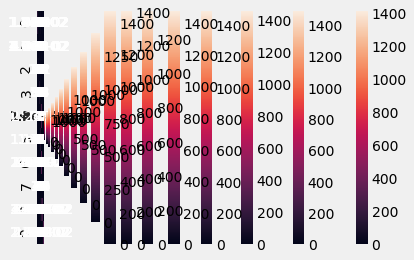

In [77]:
#Loop for each ML: LR, NB, SVM, NeuralNet
ML ={"LR":LogisticRegression(),"NB":MultinomialNB(), "SVMR":svm.SVC(kernel='rbf'), "SVML":svm.SVC(kernel='linear'), "SVMLin":svm.LinearSVC(),"NeuralNet": MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)  }
#-------------------------------------------------------------------------------
# Without Stemming
#-------------------------------------------------------------------------------
# (1) Using LDA features
# (2) Using tfidf features
# (3) Using tfidf + LDA features
#-------------------------------------------------------------------------------
df = pd.DataFrame()
columns =["feature","model", "accuracy","precision", "recall", "fscore", "support", "conf_matrix", "time_train","time_predict"]
features = {"LDA":[training_ldafeatures,testing_ldafeatures],"TFIDF":[train_vectors,test_vectors],"LDA+TFIDF":[new_train,new_test]}
for featName, feat in features.items():
    for modelName, model in ML.items():
        t0 = time.time()
        model.fit(feat[0], train_labels)
        t1 = time.time()
        test_predict = model.predict(feat[1])
        t2 = time.time()
        time_train = t1-t0
        time_predict = t2-t1
        # Print results in a nice table
        print("Results for",modelName,"Feature settings ",featName )
        print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))
        print(classification_report(test_labels, test_predict))
        report = classification_report(test_labels, test_predict, output_dict=True)
        precision, recall, fscore, support = precision_recall_fscore_support(test_labels, test_predict)
        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(test_labels, test_predict)
        conf_matrix = confusion_matrix(test_labels, test_predict, labels=["Art", "Busi", "Cult","Law", "News", "Opin", "Poli","Sine", "Soci", "Spor"])
        #print(featName,"=========>", modelName)
        #print([featName,modelName, accuracy,precision, recall, fscore, support, conf_matrix])
        result.append([featName,modelName, accuracy,precision, recall, fscore, support, conf_matrix, time_train,time_predict])
    
        
        sns.heatmap(confusion_matrix(test_labels, test_predict), annot = True)
        
df =  df.append(pd.DataFrame(result, columns=columns))
print(df)
df.to_csv("ALL_3_Feat_WOStem.csv")


In [78]:
#results.to_csv("ALL_noSmote_noStem_TM.csv")

In [79]:
#Re load the preprocessed dataset
data=pd.read_csv('Supervised_Topic_Classifier_Corpus.csv')
data.head()

print(data.columns)
data[['text','label']]=pd.DataFrame(data,columns=['text_stem','Topic'])
data=data[['text','label']]
data=data.dropna()
print(data.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Topic', 'text',
       'text_woStem', 'text_stem', 'text_Lstem', 'clean_bigram'],
      dtype='object')
Index(['text', 'label'], dtype='object')


In [80]:
#remove rows with minis as it is very small samples i.e. 20
data = data[data.label != 'Minis']
data['label'].value_counts()

News    5953
Busi    2502
Soci    1635
Poli    1611
Spor    1031
Art      749
Opin     458
Law      371
Cult     265
Sine     176
Name: label, dtype: int64

In [81]:
#EXP. II. With Stemming

# split the dataset into training and validation datasets 
train_data, test_data , train_labels, test_labels = train_test_split(data['text'], data['label'],stratify=data['label'], test_size=0.25,random_state=6007)


# Create feature vectors
vectorizer = TfidfVectorizer(min_df=5,max_df = 0.8,sublinear_tf=True,use_idf=True)
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

#LDA as feature 
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda = LDA(n_components=10)
lda.fit(train_vectors)
training_ldafeatures = lda.transform(train_vectors)
testing_ldafeatures = lda.transform(test_vectors)


# Tfidf + LDA features
import scipy
new_train = scipy.sparse.hstack((train_vectors, training_ldafeatures),format='csr')
new_test = scipy.sparse.hstack((test_vectors, testing_ldafeatures),format='csr')

In [82]:
columns = ["Feature",'model','metric', 'Score', 'trainTime',"testTime"]
results =pd.DataFrame(columns=columns)
from sklearn.metrics import log_loss, make_scorer
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
result = []

/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: 

Results for LR Feature settings  LDA
Training time: 2.035402s; Prediction time: 0.000705s
              precision    recall  f1-score   support

         Art       0.33      0.02      0.03       187
        Busi       0.34      0.03      0.05       626
        Cult       0.00      0.00      0.00        66
         Law       0.00      0.00      0.00        93
        News       0.40      0.98      0.57      1488
        Opin       0.00      0.00      0.00       114
        Poli       0.00      0.00      0.00       403
        Sine       0.00      0.00      0.00        44
        Soci       0.00      0.00      0.00       409
        Spor       0.00      0.00      0.00       258

    accuracy                           0.40      3688
   macro avg       0.11      0.10      0.06      3688
weighted avg       0.24      0.40      0.24      3688



/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for NB Feature settings  LDA
Training time: 0.031666s; Prediction time: 0.000747s
              precision    recall  f1-score   support

         Art       0.00      0.00      0.00       187
        Busi       0.00      0.00      0.00       626
        Cult       0.00      0.00      0.00        66
         Law       0.00      0.00      0.00        93
        News       0.40      1.00      0.57      1488
        Opin       0.00      0.00      0.00       114
        Poli       0.00      0.00      0.00       403
        Sine       0.00      0.00      0.00        44
        Soci       0.00      0.00      0.00       409
        Spor       0.00      0.00      0.00       258

    accuracy                           0.40      3688
   macro avg       0.04      0.10      0.06      3688
weighted avg       0.16      0.40      0.23      3688



/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for SVMR Feature settings  LDA
Training time: 7.552186s; Prediction time: 2.784901s
              precision    recall  f1-score   support

         Art       0.52      0.27      0.35       187
        Busi       0.00      0.00      0.00       626
        Cult       0.00      0.00      0.00        66
         Law       0.00      0.00      0.00        93
        News       0.41      1.00      0.59      1488
        Opin       0.00      0.00      0.00       114
        Poli       0.00      0.00      0.00       403
        Sine       0.00      0.00      0.00        44
        Soci       0.00      0.00      0.00       409
        Spor       0.00      0.00      0.00       258

    accuracy                           0.42      3688
   macro avg       0.09      0.13      0.09      3688
weighted avg       0.19      0.42      0.25      3688



/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for SVML Feature settings  LDA
Training time: 5.041116s; Prediction time: 1.209763s
              precision    recall  f1-score   support

         Art       0.55      0.03      0.06       187
        Busi       0.00      0.00      0.00       626
        Cult       0.00      0.00      0.00        66
         Law       0.00      0.00      0.00        93
        News       0.40      1.00      0.58      1488
        Opin       0.00      0.00      0.00       114
        Poli       0.00      0.00      0.00       403
        Sine       0.00      0.00      0.00        44
        Soci       0.00      0.00      0.00       409
        Spor       0.00      0.00      0.00       258

    accuracy                           0.41      3688
   macro avg       0.10      0.10      0.06      3688
weighted avg       0.19      0.41      0.24      3688



/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for SVMLin Feature settings  LDA
Training time: 0.292041s; Prediction time: 0.000743s
              precision    recall  f1-score   support

         Art       0.49      0.25      0.33       187
        Busi       0.00      0.00      0.00       626
        Cult       0.00      0.00      0.00        66
         Law       0.00      0.00      0.00        93
        News       0.41      1.00      0.58      1488
        Opin       0.00      0.00      0.00       114
        Poli       0.00      0.00      0.00       403
        Sine       0.00      0.00      0.00        44
        Soci       0.00      0.00      0.00       409
        Spor       0.00      0.00      0.00       258

    accuracy                           0.42      3688
   macro avg       0.09      0.12      0.09      3688
weighted avg       0.19      0.42      0.25      3688



/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for NeuralNet Feature settings  LDA
Training time: 17.061208s; Prediction time: 0.016819s
              precision    recall  f1-score   support

         Art       0.49      0.44      0.46       187
        Busi       0.63      0.37      0.46       626
        Cult       0.00      0.00      0.00        66
         Law       0.70      0.20      0.32        93
        News       0.57      0.89      0.69      1488
        Opin       0.48      0.40      0.44       114
        Poli       0.32      0.29      0.30       403
        Sine       0.11      0.02      0.04        44
        Soci       0.38      0.27      0.32       409
        Spor       0.29      0.04      0.07       258

    accuracy                           0.53      3688
   macro avg       0.40      0.29      0.31      3688
weighted avg       0.49      0.53      0.48      3688



/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for LR Feature settings  TFIDF
Training time: 29.249831s; Prediction time: 0.027638s
              precision    recall  f1-score   support

         Art       0.84      0.77      0.80       187
        Busi       0.82      0.77      0.80       626
        Cult       0.62      0.39      0.48        66
         Law       0.96      0.88      0.92        93
        News       0.76      0.92      0.83      1488
        Opin       0.92      0.80      0.85       114
        Poli       0.86      0.58      0.69       403
        Sine       1.00      0.75      0.86        44
        Soci       0.84      0.72      0.78       409
        Spor       0.98      0.95      0.97       258

    accuracy                           0.81      3688
   macro avg       0.86      0.75      0.80      3688
weighted avg       0.82      0.81      0.81      3688

Results for NB Feature settings  TFIDF
Training time: 0.089631s; Prediction time: 0.019826s
              precision    recall  f1-score   support

 

/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for SVMR Feature settings  TFIDF
Training time: 477.323959s; Prediction time: 95.391802s
              precision    recall  f1-score   support

         Art       0.79      0.82      0.81       187
        Busi       0.83      0.75      0.79       626
        Cult       0.73      0.36      0.48        66
         Law       0.95      0.94      0.94        93
        News       0.76      0.93      0.83      1488
        Opin       0.92      0.83      0.88       114
        Poli       0.91      0.57      0.70       403
        Sine       1.00      0.80      0.89        44
        Soci       0.85      0.71      0.77       409
        Spor       0.98      0.96      0.97       258

    accuracy                           0.82      3688
   macro avg       0.87      0.77      0.81      3688
weighted avg       0.83      0.82      0.81      3688

Results for SVML Feature settings  TFIDF
Training time: 253.638934s; Prediction time: 84.806574s
              precision    recall  f1-score   s

/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for LR Feature settings  LDA+TFIDF
Training time: 29.869817s; Prediction time: 0.036351s
              precision    recall  f1-score   support

         Art       0.81      0.79      0.80       187
        Busi       0.82      0.76      0.79       626
        Cult       0.63      0.39      0.49        66
         Law       0.95      0.88      0.92        93
        News       0.76      0.91      0.83      1488
        Opin       0.91      0.79      0.85       114
        Poli       0.86      0.58      0.69       403
        Sine       1.00      0.75      0.86        44
        Soci       0.82      0.74      0.78       409
        Spor       0.98      0.95      0.97       258

    accuracy                           0.81      3688
   macro avg       0.86      0.75      0.80      3688
weighted avg       0.82      0.81      0.81      3688

Results for NB Feature settings  LDA+TFIDF
Training time: 0.084973s; Prediction time: 0.017891s
              precision    recall  f1-score   su

/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Results for SVMR Feature settings  LDA+TFIDF
Training time: 335.399354s; Prediction time: 91.976057s
              precision    recall  f1-score   support

         Art       0.77      0.81      0.79       187
        Busi       0.83      0.77      0.80       626
        Cult       0.67      0.39      0.50        66
         Law       0.95      0.94      0.94        93
        News       0.77      0.92      0.84      1488
        Opin       0.93      0.87      0.90       114
        Poli       0.91      0.58      0.71       403
        Sine       1.00      0.82      0.90        44
        Soci       0.83      0.72      0.77       409
        Spor       0.98      0.96      0.97       258

    accuracy                           0.82      3688
   macro avg       0.86      0.78      0.81      3688
weighted avg       0.83      0.82      0.82      3688

Results for SVML Feature settings  LDA+TFIDF
Training time: 248.371167s; Prediction time: 86.478261s
              precision    recall  f1-s

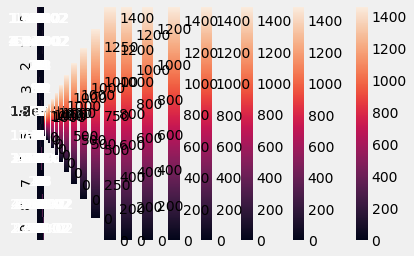

In [83]:
#Loop for each ML: LR, NB, SVM, NeuralNet
ML ={"LR":LogisticRegression(),"NB":MultinomialNB(), "SVMR":svm.SVC(kernel='rbf'), "SVML":svm.SVC(kernel='linear'), "SVMLin":svm.LinearSVC(),"NeuralNet": MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)  }
#-------------------------------------------------------------------------------
# With Stemming
#-------------------------------------------------------------------------------
# (1) Using LDA features
# (2) Using tfidf features
# (3) Using tfidf + LDA features
#-------------------------------------------------------------------------------
df = pd.DataFrame()
columns =["feature","model", "accuracy","precision", "recall", "fscore", "support", "conf_matrix", "time_train","time_predict"]
features = {"LDA":[training_ldafeatures,testing_ldafeatures],"TFIDF":[train_vectors,test_vectors],"LDA+TFIDF":[new_train,new_test]}
for featName, feat in features.items():
    for modelName, model in ML.items():
        t0 = time.time()
        model.fit(feat[0], train_labels)
        t1 = time.time()
        test_predict = model.predict(feat[1])
        t2 = time.time()
        time_train = t1-t0
        time_predict = t2-t1
        # Print results in a nice table
        print("Results for",modelName,"Feature settings ",featName )
        print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))
        print(classification_report(test_labels, test_predict))
        report = classification_report(test_labels, test_predict, output_dict=True)
        precision, recall, fscore, support = precision_recall_fscore_support(test_labels, test_predict)
        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(test_labels, test_predict)
        conf_matrix = confusion_matrix(test_labels, test_predict, labels=["Art", "Busi", "Cult","Law", "News", "Opin", "Poli","Sine", "Soci", "Spor"])
        #print(featName,"=========>", modelName)
        #print([featName,modelName, accuracy,precision, recall, fscore, support, conf_matrix])
        result.append([featName,modelName, accuracy,precision, recall, fscore, support, conf_matrix, time_train,time_predict])
    
        
        sns.heatmap(confusion_matrix(test_labels, test_predict), annot = True)
        
df =  df.append(pd.DataFrame(result, columns=columns))
print(df)
df.to_csv("ALL_3_Feat_WStem.csv")

In [84]:
#results.to_csv("ALL_noSmote_Stem_TM.csv")

In [85]:
#Re load the preprocessed dataset
data=pd.read_csv('Supervised_Topic_Classifier_Corpus.csv')

print(data.columns)
data[['text','label']]=pd.DataFrame(data,columns=['clean_bigram','Topic'])
data=data[['text','label']]
data=data.dropna()
print(data.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Topic', 'text',
       'text_woStem', 'text_stem', 'text_Lstem', 'clean_bigram'],
      dtype='object')
Index(['text', 'label'], dtype='object')


In [86]:
#remove rows with minis as it is very small samples i.e. 20
data = data[data.label != 'Minis']
data['label'].value_counts()

News    5953
Busi    2502
Soci    1635
Poli    1611
Spor    1031
Art      749
Opin     458
Law      371
Cult     265
Sine     176
Name: label, dtype: int64

In [87]:
#EXP. III. SMOTE + With no Steming

# split the dataset into training and validation datasets 
train_data, test_data , train_labels, test_labels = train_test_split(data['text'], data['label'],stratify=data['label'], test_size=0.25,random_state=6007)


#3. handling imbalance
from imblearn.over_sampling import SMOTE
#valid_x, valid_y = SMOTE().fit_resample(valid_x, valid_y)

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=5,max_df = 0.8,sublinear_tf=True,use_idf=True)
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

train_vectors,train_labels = SMOTE(k_neighbors=3).fit_resample(train_vectors, train_labels)
test_vectors,test_labels = SMOTE(k_neighbors=3).fit_resample(test_vectors, test_labels)

#LDA as feature 
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda = LDA(n_components=10)
lda.fit(train_vectors)
training_ldafeatures = lda.transform(train_vectors)
testing_ldafeatures = lda.transform(test_vectors)

training_ldafeatures,train_labels = SMOTE(k_neighbors=3).fit_resample(training_ldafeatures, train_labels)
testing_ldafeatures,test_labels = SMOTE(k_neighbors=3).fit_resample(testing_ldafeatures, test_labels)
# Tfidf + LDA features
import scipy
new_train = scipy.sparse.hstack((train_vectors, training_ldafeatures),format='csr')
new_test = scipy.sparse.hstack((test_vectors, testing_ldafeatures),format='csr')

new_train,train_labels = SMOTE(k_neighbors=3).fit_resample(new_train, train_labels)
new_test,test_labels = SMOTE(k_neighbors=3).fit_resample(new_test, test_labels)

In [88]:
columns = ["Feature",'model','metric', 'Score', 'trainTime',"testTime"]
results =pd.DataFrame(columns=columns)
from sklearn.metrics import log_loss, make_scorer
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
result = []

/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for LR Feature settings  LDA
Training time: 7.583588s; Prediction time: 0.005742s
              precision    recall  f1-score   support

         Art       0.33      0.61      0.43      1488
        Busi       0.30      0.57      0.40      1488
        Cult       0.40      0.11      0.17      1488
         Law       0.96      0.92      0.94      1488
        News       0.38      0.13      0.19      1488
        Opin       0.54      0.84      0.66      1488
        Poli       0.32      0.43      0.36      1488
        Sine       0.93      0.26      0.41      1488
        Soci       0.20      0.10      0.13      1488
        Spor       0.93      0.92      0.93      1488

    accuracy                           0.49     14880
   macro avg       0.53      0.49      0.46     14880
weighted avg       0.53      0.49      0.46     14880

Results for NB Feature settings  LDA
Training time: 0.193702s; Prediction time: 0.002524s
              precision    recall  f1-score   support

      

/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for LR Feature settings  TFIDF
Training time: 184.105138s; Prediction time: 0.227157s
              precision    recall  f1-score   support

         Art       0.79      0.85      0.82      1488
        Busi       0.89      0.87      0.88      1488
        Cult       0.86      0.72      0.78      1488
         Law       0.98      0.98      0.98      1488
        News       0.67      0.83      0.74      1488
        Opin       0.97      0.94      0.96      1488
        Poli       0.91      0.78      0.84      1488
        Sine       1.00      0.92      0.96      1488
        Soci       0.77      0.88      0.82      1488
        Spor       0.99      0.97      0.98      1488

    accuracy                           0.87     14880
   macro avg       0.88      0.87      0.87     14880
weighted avg       0.88      0.87      0.87     14880

Results for NB Feature settings  TFIDF
Training time: 0.924837s; Prediction time: 0.208435s
              precision    recall  f1-score   support



/home/selam/anaconda3/envs/python35/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for LR Feature settings  LDA+TFIDF
Training time: 177.696368s; Prediction time: 0.231203s
              precision    recall  f1-score   support

         Art       0.69      0.84      0.76      1488
        Busi       0.89      0.86      0.88      1488
        Cult       0.89      0.47      0.62      1488
         Law       0.98      0.97      0.98      1488
        News       0.67      0.83      0.74      1488
        Opin       0.96      0.95      0.96      1488
        Poli       0.92      0.79      0.85      1488
        Sine       1.00      0.83      0.91      1488
        Soci       0.64      0.89      0.75      1488
        Spor       0.98      0.99      0.98      1488

    accuracy                           0.84     14880
   macro avg       0.86      0.84      0.84     14880
weighted avg       0.86      0.84      0.84     14880

Results for NB Feature settings  LDA+TFIDF
Training time: 0.834725s; Prediction time: 0.214910s
              precision    recall  f1-score   s

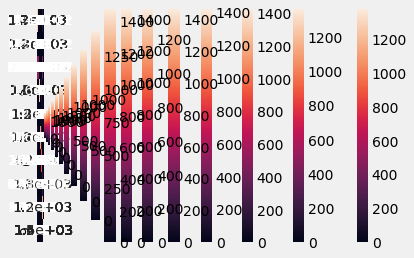

In [89]:
#Loop for each ML: LR, NB, SVM, NeuralNet
ML ={"LR":LogisticRegression(),"NB":MultinomialNB(), "SVMR":svm.SVC(kernel='rbf'), "SVML":svm.SVC(kernel='linear'), "SVMLin":svm.LinearSVC(),"NeuralNet": MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)  }
#-------------------------------------------------------------------------------
# With SMOTE
#-------------------------------------------------------------------------------
# (1) Using LDA features
# (2) Using tfidf features
# (3) Using tfidf + LDA features
#-------------------------------------------------------------------------------
df = pd.DataFrame()
columns =["feature","model", "accuracy","precision", "recall", "fscore", "support", "conf_matrix", "time_train","time_predict"]
features = {"LDA":[training_ldafeatures,testing_ldafeatures],"TFIDF":[train_vectors,test_vectors],"LDA+TFIDF":[new_train,new_test]}
for featName, feat in features.items():
    for modelName, model in ML.items():
        t0 = time.time()
        model.fit(feat[0], train_labels)
        t1 = time.time()
        test_predict = model.predict(feat[1])
        t2 = time.time()
        time_train = t1-t0
        time_predict = t2-t1
        # Print results in a nice table
        print("Results for",modelName,"Feature settings ",featName )
        print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))
        print(classification_report(test_labels, test_predict))
        report = classification_report(test_labels, test_predict, output_dict=True)
        precision, recall, fscore, support = precision_recall_fscore_support(test_labels, test_predict)
        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(test_labels, test_predict)
        conf_matrix = confusion_matrix(test_labels, test_predict, labels=["Art", "Busi", "Cult","Law", "News", "Opin", "Poli","Sine", "Soci", "Spor"])
        #print(featName,"=========>", modelName)
        #print([featName,modelName, accuracy,precision, recall, fscore, support, conf_matrix])
        result.append([featName,modelName, accuracy,precision, recall, fscore, support, conf_matrix, time_train,time_predict])
    
        
        sns.heatmap(confusion_matrix(test_labels, test_predict), annot = True)
        
df =  df.append(pd.DataFrame(result, columns=columns))
print(df)
df.to_csv("ALL_3_Feat_WOStem_SMOTE.csv")

In [90]:
#results.to_csv("ALL_Smote_noStem_TM.csv")

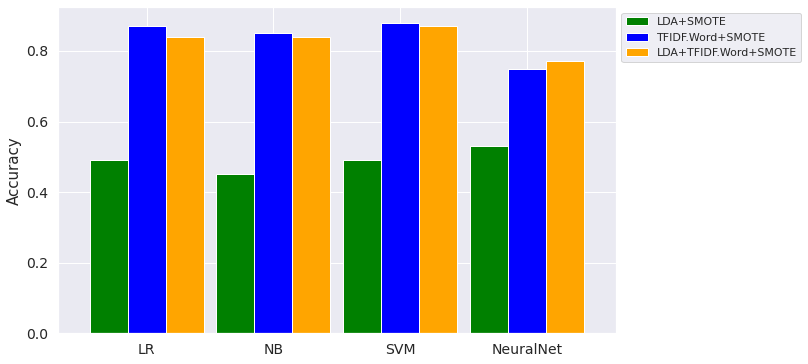

In [76]:
# RESULT VISUALIZATION

# Bar plot features vs ML based on AVG ACCuraCY Using the results generated above EXP. III
import pandas as pd 
import seaborn as sns
sns.set()
#import matplotlib.pyplot as plt 
data=[["LR",0.49,0.87, 0.84],
      ["NB",0.45,0.85, 0.84],
      ["SVM",0.49,0.88,0.87],
      ["NeuralNet",0.53,0.75, 0.77],
     ]

df=pd.DataFrame(data,columns=["ML","LDA+SMOTE","TFIDF.Word+SMOTE","LDA+TFIDF.Word+SMOTE"])

df.plot(x="ML", y=["LDA+SMOTE","TFIDF.Word+SMOTE","LDA+TFIDF.Word+SMOTE"], kind="bar",rot=0,width=0.9,figsize=(10,6),fontsize=14,color=[ 'green', 'blue', 'orange','red'])
plt.ylabel("Accuracy",fontsize=15)
plt.xlabel("")#Machine Learning Algorithms for Sentiment Classification",fontsize=14)

plt.legend(bbox_to_anchor=(1.0,1.0))
#plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

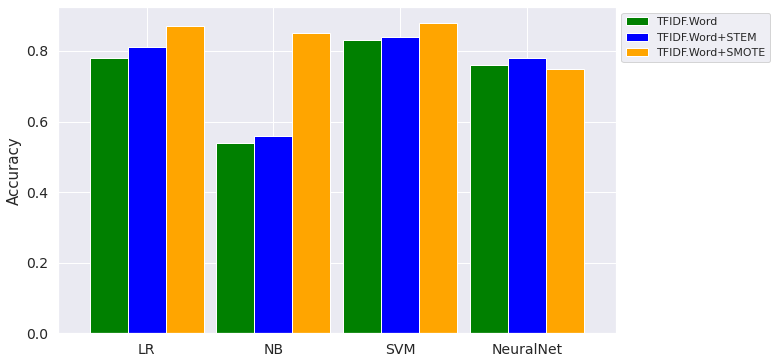

In [77]:
# Bar plot features vs ML based on AVG ACCuraCY Using the results generated above EXP. II

import pandas as pd 
import matplotlib.pyplot as plt 
data=[["LR",0.78,0.81, 0.87],
      ["NB",0.54,0.56, 0.85],
      ["SVM",0.83,0.84,0.88],
      ["NeuralNet",0.76,0.78, 0.75],
     ]

df=pd.DataFrame(data,columns=["ML","TFIDF.Word","TFIDF.Word+STEM","TFIDF.Word+SMOTE"])

df.plot(x="ML", y=["TFIDF.Word","TFIDF.Word+STEM","TFIDF.Word+SMOTE"], kind="bar",rot=0,width=0.9,figsize=(10,6),fontsize=14,color=[ 'green', 'blue', 'orange','red'])
plt.ylabel("Accuracy",fontsize=15)
plt.xlabel("")#Machine Learning Algorithms for Sentiment Classification",fontsize=14)
plt.legend(bbox_to_anchor=(1.0,1.0))
#plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

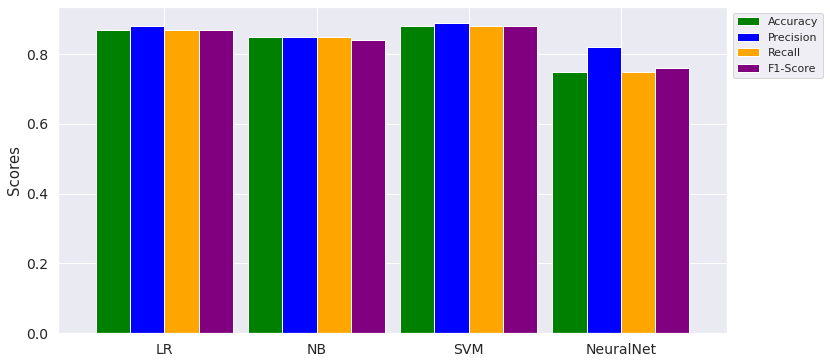

In [78]:
# Bar plot features vs metrics (acc, p, recall, f1) of the SVM, NB, RF and NN the results generated above EXP. III
import pandas as pd 
import matplotlib.pyplot as plt 
data=[["LR",0.87,0.88, 0.87,0.87],
      ["NB",0.85,0.85, 0.85,0.84],
      ["SVM",0.88,0.89,0.88,0.88],
      ["NeuralNet",0.75,0.82, 0.75, 0.76],
     ]

df=pd.DataFrame(data,columns=["ML","Accuracy","Precision","Recall","F1-Score"])
df.plot(x="ML", y=["Accuracy","Precision","Recall","F1-Score"], kind="bar",rot=0,width=0.9,figsize=(12,6),fontsize=14,color=[ 'green', 'blue', 'orange','purple','red'])
plt.ylabel("Scores",fontsize=15)
plt.xlabel("", fontsize=14)#Machine Learning Algorithms for Sentiment Classification",fontsize=14)
#plt.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=1)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

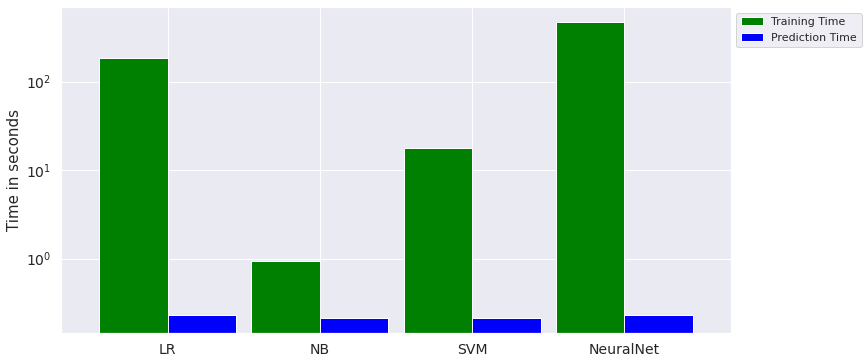

In [79]:
# Bar plot of Training and prediction time of the results generated above EXP. III for TF-IDF feature set
import pandas as pd 
import matplotlib.pyplot as plt 
data=[["LR",184.11,0.23],
      ["NB",0.93,0.21],
      ["SVM",17.8,0.21],
      ["NeuralNet",471.8,0.23],
     ]

df=pd.DataFrame(data,columns=["ML","Training Time","Prediction Time"])
df.plot(x="ML", y=["Training Time","Prediction Time"], kind="bar",rot=0,width=0.9,figsize=(12,6),fontsize=14,color=[ 'green', 'blue', 'orange','purple','red'])
plt.ylabel("Time in seconds",fontsize=15)
plt.yscale('log')
plt.xlabel("", fontsize=14)#Machine Learning Algorithms for Sentiment Classification",fontsize=14)
#plt.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=1)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

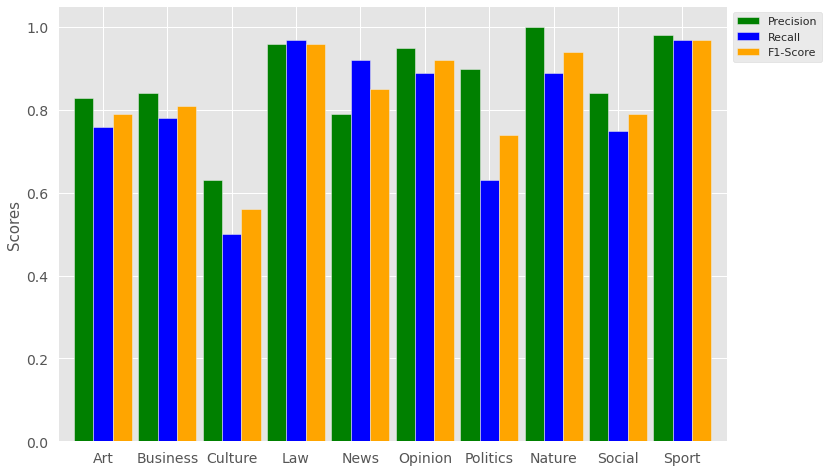

In [80]:
#Bar plot of SVMLin prediction accross categories of the results generated above EXP. I for TF-IDF feature set
# SVMLin +TFIDF +NoSMOTE
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.style.use('ggplot')
data=[['Art',0.83 ,     0.76 ,     0.79 ],#      187,
      ['Business',0.84,      0.78,      0.81],#       626 
      ['Culture',0.63,      0.50,      0.56],#        66
      ['Law',0.96,      0.97,      0.96],#        93
      ['News',0.79,      0.92,      0.85],#      1488
      ['Opinion',0.95,      0.89,      0.92],#       114
      ['Politics',0.90,      0.63,      0.74],#       403
      ['Nature',1.00,      0.89,      0.94],#        44
      ['Social',0.84,      0.75,      0.79],#       409
      ['Sport',0.98,      0.97,      0.97]#       258
     ]

df=pd.DataFrame(data,columns=["ML","Precision","Recall","F1-Score"])
df.plot(x="ML", y=["Precision","Recall","F1-Score"], kind="bar",rot=0,width=0.9,fontsize=14,figsize=(12,8),color=[ 'green', 'blue', 'orange', 'red'])
plt.ylabel("Scores",fontsize=15)
plt.xlabel("")#Machine Learning Algorithms for Sentiment Classification",fontsize=14)
#plt.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=1)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

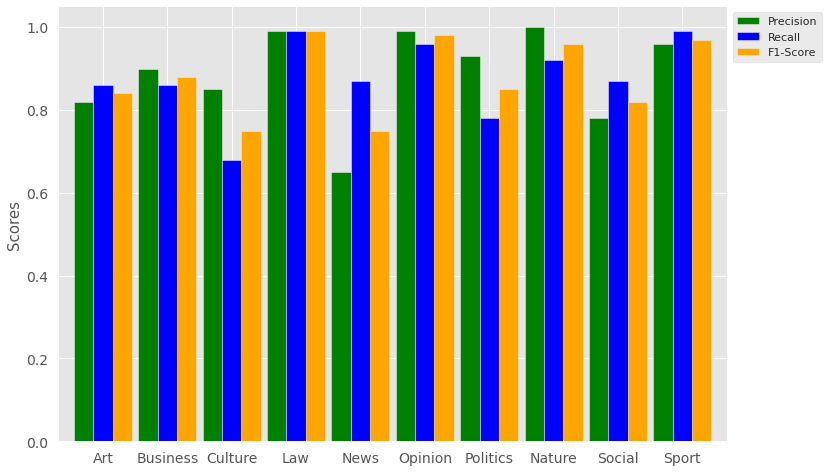

In [81]:
#Bar plot of SVMLin prediction accross categories of the results generated above EXP. III for TF-IDF feature set
#SVMLin +TFIDF + SMOTE
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.style.use('ggplot')
data=[['Art',0.82 ,     0.86 ,     0.84 ] ,#    1488 ],
      ['Business',0.90,      0.86,      0.88] ,#     1488], 
      ['Culture',0.85,      0.68,      0.75] ,#     1488 ],
      ['Law',0.99,      0.99,      0.99] ,#     1488],
      ['News',0.65,      0.87,      0.75] ,#    1488 ],
      ['Opinion',0.99,      0.96,      0.98] ,#     1488],
      ['Politics',0.93,      0.78,      0.85] ,#     1488],
      ['Nature',1.00,      0.92,      0.96] ,#     1488],
      ['Social',0.78,      0.87,      0.82] ,#      1488],
      ['Sport',0.96,      0.99 ,     0.97] #      1488]
     ]

df=pd.DataFrame(data,columns=["ML","Precision","Recall","F1-Score"])
df.plot(x="ML", y=["Precision","Recall","F1-Score"], kind="bar",rot=0,width=0.9,fontsize=14,figsize=(12,8),color=[ 'green', 'blue', 'orange', 'red'])
plt.ylabel("Scores",fontsize=15)
plt.xlabel("")#Machine Learning Algorithms for Sentiment Classification",fontsize=14)
#plt.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=1)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

([<matplotlib.axis.YTick at 0x7fc35f500820>,
 [Text(0, 0.5, 'Art'),
  Text(0, 1.5, 'Business'),
  Text(0, 2.5, 'Culture'),
  Text(0, 3.5, 'Law'),
  Text(0, 4.5, 'News'),
  Text(0, 5.5, 'Opinion'),
  Text(0, 6.5, 'Politics'),
  Text(0, 7.5, 'Nature'),
  Text(0, 8.5, 'Social'),
  Text(0, 9.5, 'Sport')])

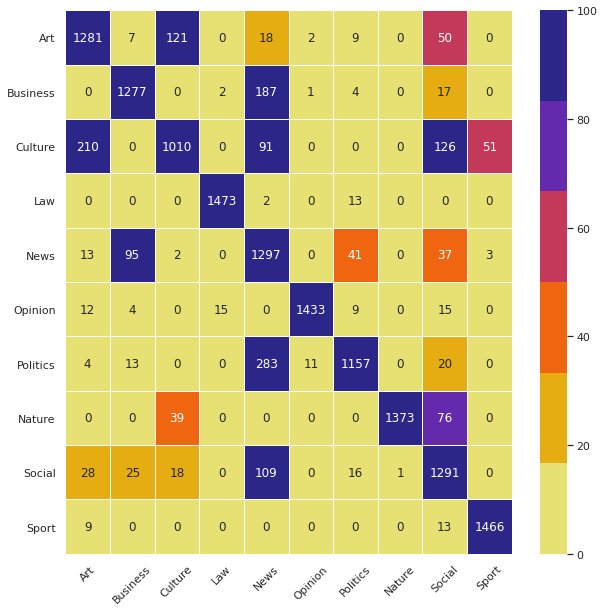

In [82]:
# Confusion matrix plot of SVMLin prediction accross categories of the results generated above EXP. III for TF-IDF feature set

# SVMLin+TF-IDF+SMOTE
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import seaborn as sns 
sns.set()
colormap = sns.color_palette("CMRmap_r")

con_matrix = np.array([[1281,    7 , 121  ,  0  , 18 ,   2  ,  9  ,  0 ,  50  ,  0],
                       [   0 ,1277 ,   0 ,   2 , 187 ,   1 ,   4  ,  0  , 17  ,  0],
                       [ 210  ,  0 , 1010 ,    0 ,   91,     0 ,    0  ,   0  , 126 ,   51],
                       [   0  ,   0  ,   0 , 1473  ,   2  ,   0   , 13 ,    0  ,   0 ,    0], 
                       [  13  ,  95  ,   2  ,   0 , 1297 ,    0 ,   41 ,    0  ,  37 ,    3], 
                       [  12  ,   4  ,   0 ,   15,     0,  1433,     9,     0 ,   15,     0], 
                       [   4 ,   13 ,    0 ,    0 ,  283,    11,  1157,     0,    20,     0], 
                       [   0 ,    0 ,   39 ,    0 ,    0,     0,     0,  1373,    76,    0], 
                       [  28,    25,    18,     0,   109 ,    0 ,   16,     1,  1291,     0], 
                       [   9 ,    0 ,    0,     0,     0 ,    0 ,    0,     0 ,   13,  1466]])

my_mask = np.zeros((con_matrix.shape[0], con_matrix.shape[0]), dtype=int)
for i in range(con_matrix.shape[0]):
    for j in range(con_matrix.shape[0]):
        my_mask[i][j] = con_matrix[i][j] == 0 

fig_dims = (10, 10)
plt.subplots(figsize=fig_dims)

sns.heatmap(con_matrix, annot=True, fmt="d", linewidths=.5,robust=True,cmap=colormap, vmin=0, vmax=100)#, cmap="Pastel1", cbar=False, mask=my_mask, vmax=15)




party_names = ['Art', 'Business', 'Culture', 'Law', 'News', 'Opinion', 'Politics', 'Nature', 'Social', 'Sport']

plt.xticks(np.arange(len(party_names))+0.5, party_names, rotation=45)
plt.yticks(np.arange(len(party_names))+0.5, party_names, rotation='horizontal')


([<matplotlib.axis.YTick at 0x7fc35f416f70>,
 [Text(0, 0.5, 'Art'),
  Text(0, 1.5, 'Business'),
  Text(0, 2.5, 'Culture'),
  Text(0, 3.5, 'Law'),
  Text(0, 4.5, 'News'),
  Text(0, 5.5, 'Opinion'),
  Text(0, 6.5, 'Politics'),
  Text(0, 7.5, 'Nature'),
  Text(0, 8.5, 'Social'),
  Text(0, 9.5, 'Sport')])

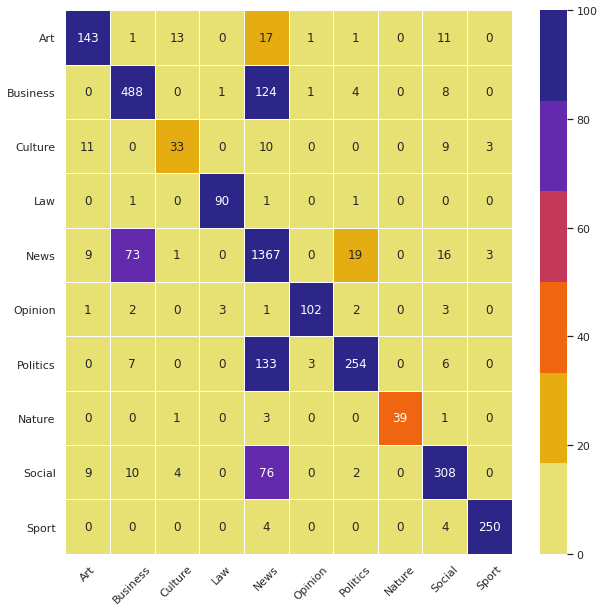

In [83]:
# Confusion matrix plot of SVMLin prediction accross categories of the results generated above EXP. I for TF-IDF feature set

#SVMLin+TF-IDF 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set()


con_matrix = np.array([[ 143,    1,   13,    0,   17,    1,    1,    0,   11,    0],
 [   0,  488,    0,    1,  124,    1,    4,    0,    8,    0],
 [  11,    0,   33,    0,   10,    0,    0,    0,    9,    3],
 [   0,    1,    0,   90,    1,    0,    1,    0,    0,    0],
 [   9,   73,    1,    0, 1367,    0,   19,    0,   16,   3],
 [   1,    2,    0,    3,    1,  102,    2,    0,    3,    0],
 [   0,    7,    0,    0,  133,    3,  254,    0,    6,    0],
 [   0,    0,    1,    0,    3,    0,    0,   39,    1,    0],
 [   9,   10,    4,    0,   76,    0,    2,    0,  308,    0],
 [   0,    0,    0,    0,    4,    0,    0,    0,    4,  250]])

my_mask = np.zeros((con_matrix.shape[0], con_matrix.shape[0]), dtype=int)
for i in range(con_matrix.shape[0]):
    for j in range(con_matrix.shape[0]):
        my_mask[i][j] = con_matrix[i][j] == 0 

fig_dims = (10, 10)
plt.subplots(figsize=fig_dims)

sns.heatmap(con_matrix, annot=True, fmt="d", linewidths=.5,robust=True,cmap=colormap, vmin=0, vmax=100)#, cmap="Pastel1", cbar=False, mask=my_mask, vmax=15)





party_names = ['Art', 'Business', 'Culture', 'Law', 'News', 'Opinion', 'Politics', 'Nature', 'Social', 'Sport']

plt.xticks(np.arange(len(party_names))+0.5, party_names, rotation=45)
plt.yticks(np.arange(len(party_names))+0.5, party_names, rotation='horizontal')